In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier

In [2]:
PROJECT_ROOT = os.path.abspath("..")
train_path = os.path.join(PROJECT_ROOT, "data", "unsw-nb15","raw", "UNSW_NB15_training-set.csv")
test_path = os.path.join(PROJECT_ROOT, "data", "unsw-nb15","raw", "UNSW_NB15_testing-set.csv")

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

train_df = pd.concat([train_df, test_df], ignore_index=True)

In [3]:
train_df.head(n=5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [5]:
train_df[train_df['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [6]:
train_df['service'].replace('-',np.nan,inplace=True)

/tmp/ipykernel_946221/3227912851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['service'].replace('-',np.nan,inplace=True)


In [7]:
train_df.isnull().sum()

id                        0
dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm    

In [8]:
train_df.shape

(257673, 45)

In [9]:
train_df.dropna(inplace=True)

In [10]:
train_df.shape

(116352, 45)

In [12]:
train_df['attack_cat'].value_counts()

attack_cat
Generic           57956
Normal            29113
Exploits          21480
DoS                2508
Fuzzers            2266
Reconnaissance     2207
Analysis            564
Worms               148
Backdoor            110
Name: count, dtype: int64

In [13]:
train_df['state'].value_counts()

state
INT    57894
FIN    47350
CON    10859
REQ      234
RST       14
ACC        1
Name: count, dtype: int64

In [14]:
train_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256803,81463,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,...,1,2,0,0,1,1,1,0,Normal,0
256807,81467,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,...,1,1,0,0,1,1,1,0,Normal,0
256859,81519,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,...,1,2,0,0,1,1,2,0,Normal,0
256881,81541,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,...,1,3,0,0,1,1,3,0,Normal,0


In [15]:
features_path = os.path.join(PROJECT_ROOT, "data", "unsw-nb15", "raw", "NUSW-NB15_features.csv")

# The UNSW features file includes Windows-1252 smart quotes (e.g. byte 0x92),
 # so decoding as UTF-8 can fail. Try a couple of common encodings:
for enc in ("utf-8", "cp1252", "latin1"):
    try:
        features = pd.read_csv(features_path, encoding=enc)
        print(f"Loaded features with encoding={enc}")
        break
    except UnicodeDecodeError as e:
        last_err = e
else:
    raise last_err

Loaded features with encoding=cp1252


In [16]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [17]:
features['Type '] = features['Type '].str.lower()

In [18]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [19]:
# selecting common column names from dataset and feature dataset
cols = train_df.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [20]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(train_df[c])

In [21]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(train_df[c])

In [22]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(train_df[c])

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116352 entries, 3 to 257535
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 116352 non-null  int64  
 1   dur                116352 non-null  float64
 2   proto              116352 non-null  object 
 3   service            116352 non-null  object 
 4   state              116352 non-null  object 
 5   spkts              116352 non-null  int64  
 6   dpkts              116352 non-null  int64  
 7   sbytes             116352 non-null  int64  
 8   dbytes             116352 non-null  int64  
 9   rate               116352 non-null  float64
 10  sttl               116352 non-null  int64  
 11  dttl               116352 non-null  int64  
 12  sload              116352 non-null  float64
 13  dload              116352 non-null  float64
 14  sloss              116352 non-null  int64  
 15  dloss              116352 non-null  int64  
 16  sinpkt 

In [24]:
train_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256803,81463,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,...,1,2,0,0,1,1,1,0,Normal,0
256807,81467,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,...,1,1,0,0,1,1,1,0,Normal,0
256859,81519,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,...,1,2,0,0,1,1,2,0,Normal,0
256881,81541,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,...,1,3,0,0,1,1,3,0,Normal,0


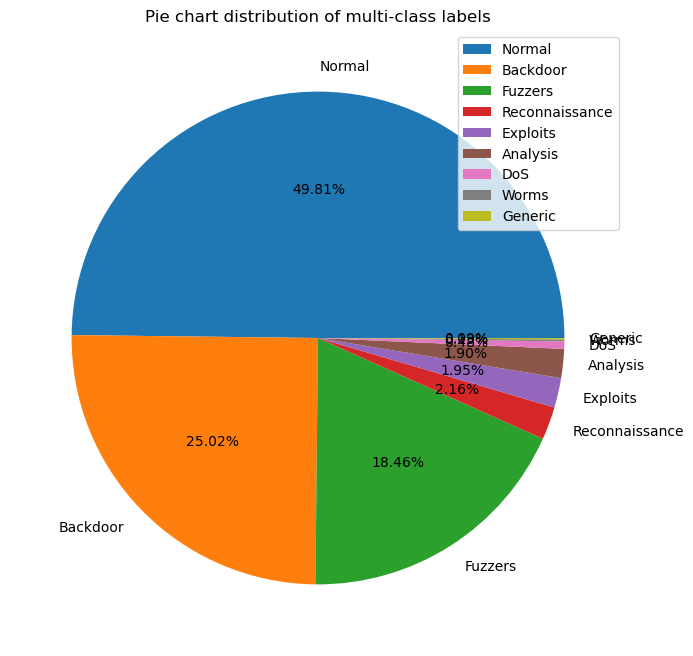

In [25]:
# Ensure plots output directory exists under the project root
plots_dir = os.path.join(PROJECT_ROOT, "plots")
os.makedirs(plots_dir, exist_ok=True)

plt.figure(figsize=(8,8))
plt.pie(train_df.attack_cat.value_counts(), labels=train_df.attack_cat.unique(), autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig(os.path.join(plots_dir, "Pie_chart_multi.png"))
plt.show()

## One hot encoding

In [26]:
num_col = train_df.select_dtypes(include='number').columns

# selecting categorical train_df attributes
cat_col = train_df.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [27]:
# creating a dataframe with only categorical attributes
data_cat = train_df[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [28]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [29]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
17,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
21,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False


In [30]:
train_df.shape

(116352, 45)

In [31]:
data = pd.concat([train_df, data_cat],axis=1)

In [32]:
data.shape

(116352, 65)

In [33]:
data.drop(columns=cat_col,inplace=True)

In [34]:
data.shape

(116352, 62)

### Data Normalization

In [35]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [36]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [37]:
# data before normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,False,False,False,False,False,False,True,False,False,False
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,True,False,False,False,False,False,True,False,False,False
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,False,True,False,False,False,False,False,True,False,False
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,False,False,False,False,False,False,True,False,False,False
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,False,False,False,False,False,False,True,False,False,False


In [38]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [39]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802759e-02,0.001033,0.001089,0.000039,0.000053,0.000014,0.138393,0.992126,0.000001,...,False,False,False,False,False,False,True,False,False,False
11,12,3.488503e-02,0.005730,0.002541,0.003919,0.000151,0.000043,0.138393,0.992126,0.000092,...,True,False,False,False,False,False,True,False,False,False
15,16,3.333360e-08,0.000094,0.000000,0.000005,0.000000,0.500000,0.995536,0.000000,0.119792,...,False,True,False,False,False,False,False,True,False,False
17,18,6.559318e-03,0.000845,0.000726,0.000055,0.000075,0.000043,0.138393,0.992126,0.000007,...,False,False,False,False,False,False,True,False,False,False
21,22,5.633661e-03,0.000845,0.000545,0.000065,0.000018,0.000044,0.995536,0.992126,0.000009,...,False,False,False,False,False,False,True,False,False,False


### Label encoding

In [40]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [41]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [42]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [43]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [44]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

### Correlation between features of dataset

In [45]:
num_col.append('label')

In [46]:
num_col = list(multi_data.select_dtypes(include='number').columns)

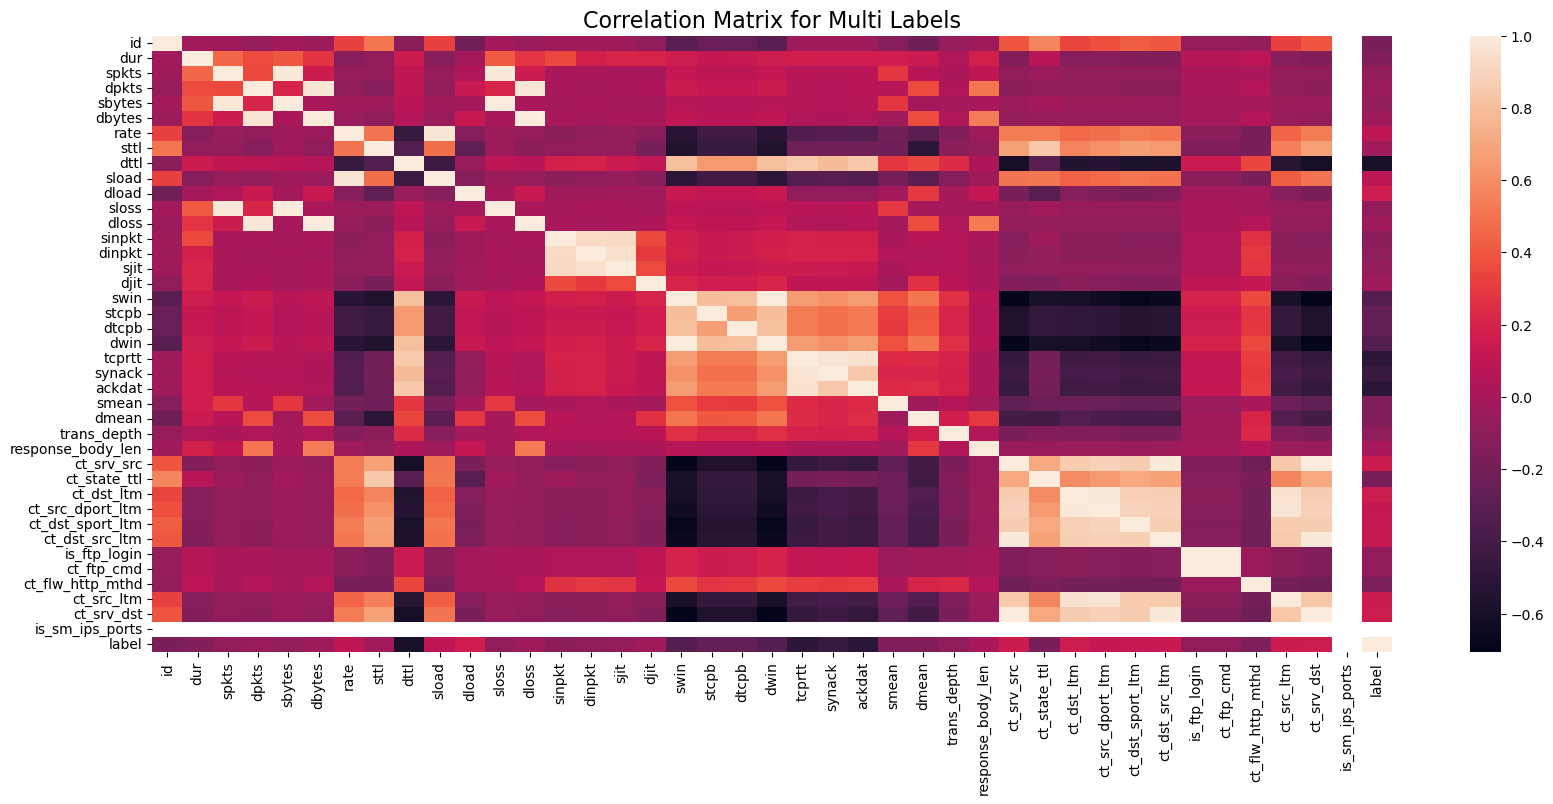

In [47]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig(os.path.join(plots_dir, "correlation_matrix_multi.png"))
plt.show()

### Feature Selection

In [48]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

swin      0.330215
dwin      0.330234
synack    0.448737
tcprtt    0.500531
ackdat    0.512859
dttl      0.594611
label     1.000000
Name: label, dtype: float64

In [49]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label'], dtype='object')

In [50]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

In [51]:
unsw_processed_dir = os.path.join(PROJECT_ROOT, "data", "unsw-nb15","processed")
multi_data.to_csv(os.path.join(unsw_processed_dir,'multi_data.csv'))

## MULTI-CLASS CLASSIFICATION

### Data slitting

In [52]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

In [54]:
mlp_multi = MLPClassifier(random_state=123, solver='adam', max_iter=8000)
mlp_multi.fit(X_train,y_train)

,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,8000
,shuffle,True
,random_state,123


In [55]:
y_pred = mlp_multi.predict(X_test)

In [56]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.2715292499856758
Mean Squared Error -  0.7974560247521916
Root Mean Squared Error -  0.8930039332232482
R2 Score -  44.45328106173952
Accuracy -  88.57503008078841


In [57]:
print(classification_report(y_test, y_pred,target_names=le2.classes_))

                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       157
      Backdoor       0.00      0.00      0.00        37
           DoS       0.00      0.00      0.00       745
      Exploits       0.63      0.99      0.77      6379
       Fuzzers       0.00      0.00      0.00       708
       Generic       0.99      0.99      0.99     17418
        Normal       1.00      0.84      0.91      8760
Reconnaissance       0.00      0.00      0.00       665
         Worms       0.00      0.00      0.00        37

      accuracy                           0.89     34906
     macro avg       0.29      0.31      0.30     34906
  weighted avg       0.86      0.89      0.86     34906



/home/e20094/miniconda3/envs/fl-nids/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/e20094/miniconda3/envs/fl-nids/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/e20094/miniconda3/envs/fl-nids/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me